In [17]:
# imports and setting main dir
from __future__ import division
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import csv
plt.rcParams['figure.figsize'] = [10, 10]
main_dir = '/Users/andreas/Desktop/mura/MURA-v1.1/'

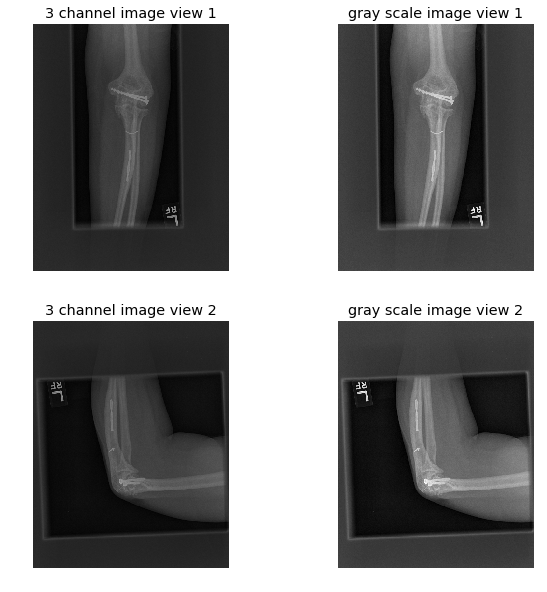

In [18]:
# plotting multi view positive or abnormal sample along with 
# conversion to grayscale

study_dir = os.path.join(main_dir,'train/XR_ELBOW/patient04904/study1_positive/')
img1 = cv2.imread((os.path.join(study_dir,'image1.png')), 1)
img2 = cv2.imread((os.path.join(study_dir,'image2.png')), 1)

gray_img1 = cv2.imread((os.path.join(study_dir,'image1.png')), 0)
gray_img2 = cv2.imread((os.path.join(study_dir,'image2.png')), 0)

plt.subplot(221)
plt.title('3 channel image view 1')
plt.imshow(img1)
plt.axis('off')

plt.subplot(222)
plt.title('gray scale image view 1')
plt.imshow(gray_img1, cmap='gray')
plt.axis('off')

plt.subplot(223)
plt.title('3 channel image view 2')
plt.imshow(img2)
plt.axis('off')

plt.subplot(224)
plt.title('gray scale image view 2')
plt.imshow(gray_img2, cmap='gray')
plt.axis('off')

plt.show()

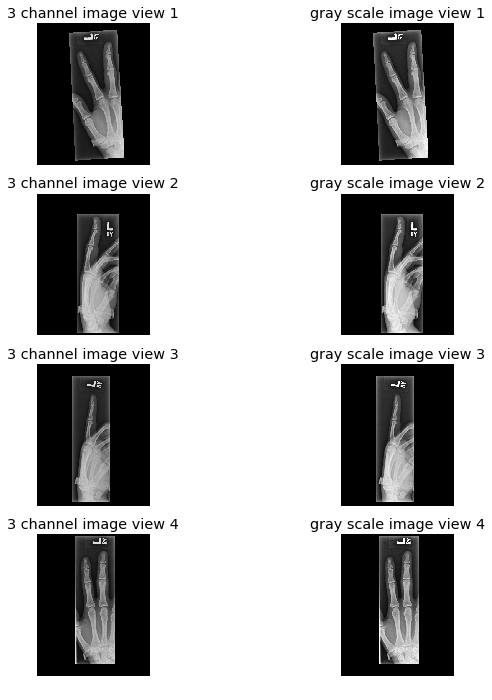

In [19]:
# plotting multi view negative or normal sample along with 
# conversion to grayscale

plt.rcParams['figure.figsize'] = [10, 12]
study_dir = os.path.join(main_dir,'train/XR_FINGER/patient04430/study1_negative/')

img1 = cv2.imread((os.path.join(study_dir,'image1.png')), 1)
img2 = cv2.imread((os.path.join(study_dir,'image2.png')), 1)
img3 = cv2.imread((os.path.join(study_dir,'image3.png')), 1)
img4 = cv2.imread((os.path.join(study_dir,'image4.png')), 1)

gray_img1 = cv2.imread((os.path.join(study_dir,'image1.png')), 0)
gray_img2 = cv2.imread((os.path.join(study_dir,'image2.png')), 0)
gray_img3 = cv2.imread((os.path.join(study_dir,'image3.png')), 0)
gray_img4 = cv2.imread((os.path.join(study_dir,'image4.png')), 0)

plt.subplot(421)
plt.title('3 channel image view 1')
plt.imshow(img1)
plt.axis('off')

plt.subplot(422)
plt.title('gray scale image view 1')
plt.imshow(gray_img1, cmap='gray')
plt.axis('off')

plt.subplot(423)
plt.title('3 channel image view 2')
plt.imshow(img2)
plt.axis('off')

plt.subplot(424)
plt.title('gray scale image view 2')
plt.imshow(gray_img2, cmap='gray')
plt.axis('off')

plt.subplot(425)
plt.title('3 channel image view 3')
plt.imshow(img3)
plt.axis('off')

plt.subplot(426)
plt.title('gray scale image view 3')
plt.imshow(gray_img3, cmap='gray')
plt.axis('off')

plt.subplot(427)
plt.title('3 channel image view 4')
plt.imshow(img4)
plt.axis('off')

plt.subplot(428)
plt.title('gray scale image view 4')
plt.imshow(gray_img4, cmap='gray')
plt.axis('off')

plt.show()


Total number of Train images 36808
Positive or Abnormal Class Percent: 0.404069767442



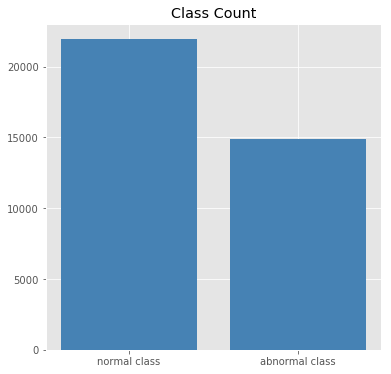

In [20]:
# plotting class distribution bar chart
import glob as glob
plt.rcParams['figure.figsize'] = [6, 6]
class_label_csv_dir = os.path.join(main_dir,'train_labeled_studies.csv')
plt.style.use('ggplot')
classes = []

with open(class_label_csv_dir , 'rb') as f:
    
    class_count = {0:0, 1:0}
    reader = csv.reader(f)
    for row in reader:
        study_label = int(row[1])
        
        file_path = os.path.join('/Users/andreas/Desktop/mura/',row[0])
        patient_files = glob.glob(file_path + '/*.png')
        
        class_count[study_label] += len(patient_files)

    class_count_arr = class_count.values()
    
    print "Total number of Train images {}".format(sum(class_count_arr))
    print "{0}: {1}".format("Positive or Abnormal Class Percent" ,class_count_arr[1]/sum(class_count_arr))
    print
    
    plt.title('Class Count')
    plt.bar(x, class_count_arr, color='steelblue')
    plt.xticks(x, ('normal class', 'abnormal class'))  
    plt.show()
    

Class Percents for Positive or Abnormal Class By Bone Type:
XR_WRIST: 0.408839212469
XR_SHOULDER: 0.497434061344
XR_HUMERUS: 0.470911949686
XR_HAND: 0.267725058633
XR_FOREARM: 0.362191780822
XR_ELBOW: 0.406814033665
XR_FINGER: 0.385428907168


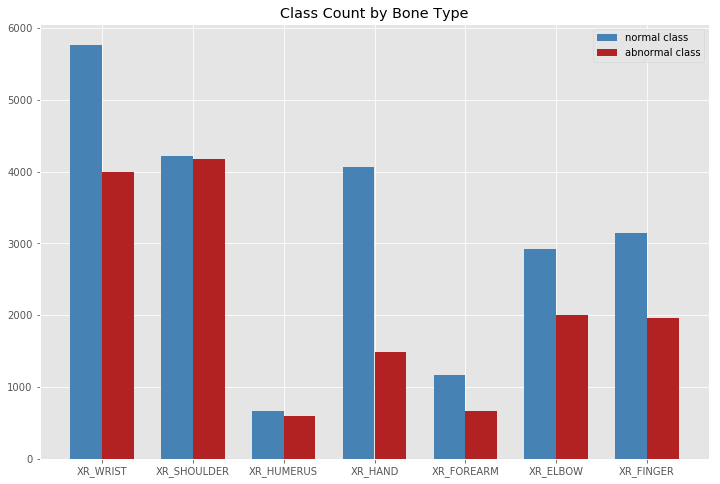

In [22]:
# plotting class distribution bar chart by bone type

plt.rcParams['figure.figsize'] = [12, 8]
class_label_csv_dir = os.path.join(main_dir,'train_labeled_studies.csv')
plt.style.use('ggplot')
classes = []
with open(class_label_csv_dir , 'rb') as f:

    bone_dic = {}
    reader = csv.reader(f)

    for row in reader:
        bone_type = row[0].split('/')[2]
        study_label = int(row[1])

        if bone_type not in bone_dic:
            bone_dic[bone_type] = [0,0]
            
        file_path = os.path.join('/Users/andreas/Desktop/mura/', row[0])
        patient_files = glob.glob(file_path + '/*.png')

        bone_dic[bone_type][study_label] += len(patient_files)
            

N = 7
negative_class = [v[0] for v in bone_dic.values()]
positive_class = [v[1] for v in bone_dic.values()]

class_percents = [v[1]/(v[0] + v[1]) for v in bone_dic.values()]
print "Class Percents for Positive or Abnormal Class By Bone Type:"
for n, p in zip(bone_dic.keys(), class_percents):
    print "{0}: {1}".format(n, p)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, negative_class, width, label='normal class', color='steelblue')
plt.bar(ind + width, positive_class, width, label='abnormal class', color='firebrick')

plt.title('Class Count by Bone Type')

plt.xticks(ind + width / 2, bone_dic.keys())
plt.legend(loc='best')
plt.show()